<a href="https://colab.research.google.com/github/kevinamexo/Machine-Learning/blob/Jupyter-Notebook-files/GMM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
 
from random import sample
import glob
from keras.models import load_model, load_model
import shutil
from glob import iglob
from collections import Counter
import cv2# Active Learning template
## Calculate the entropy of each training example
import itertools
import random
 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import h5py import Footer from './

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/LDC/

/content/drive/My Drive/Colab Notebooks/LDC


In [ ]:
##Data Augmentation

BASE_DATASET_FOLDER="Covid_project/train-test-val"
TRAIN_FOLDER = "train"
VALIDATION_FOLDER = "val"
TEST_FOLDER = "test"

IMAGE_SIZE= (128,128)
INPUT_SHAPE=(128,128,3)

TRAIN_BATCH_SIZE = 64
VAL_BATCH_SIZE = 8
EPOCHS = 200
LEARNING_RATE = 0.0001


In [ ]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=[0.5,1.0],
    shear_range= 0.2,
    rotation_range=20,
    fill_mode='nearest'
)

i =0 
train_generator= train_datagen.flow_from_directory(
    os.path.join(BASE_DATASET_FOLDER, TRAIN_FOLDER),
    target_size= IMAGE_SIZE,
    batch_size=TRAIN_BATCH_SIZE,
    class_mode='categorical',
    shuffle=True)

Found 390 images belonging to 3 classes.


In [ ]:
test_datagen= ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=[0.5,1.0],
    shear_range= 0.2,
    rotation_range=20,
    fill_mode='nearest'
)


test_generator= train_datagen.flow_from_directory(
    os.path.join(BASE_DATASET_FOLDER, TEST_FOLDER),
    target_size= IMAGE_SIZE,
    class_mode='categorical',
    shuffle=False)

Found 165 images belonging to 3 classes.


In [ ]:
val_datagen= ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=[0.5,1.0],
    shear_range= 0.2,
    rotation_range=20,
    fill_mode='nearest'
)

i =0 
val_generator= train_datagen.flow_from_directory(
    os.path.join(BASE_DATASET_FOLDER, VALIDATION_FOLDER),
    target_size= IMAGE_SIZE,
    class_mode='categorical',
    shuffle=True)

Found 99 images belonging to 3 classes.


In [ ]:
from keras import backend as K
from keras.models import Sequential
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Import OpenCV
import cv2


from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Model
def vgg16_model(input_shape=INPUT_SHAPE, num_classes=3, mname = 'VGG16'):
    
    if mname is 'VGG16' or 'vgg16': 
        model = VGG16(weights = "imagenet", include_top=False, input_shape = (input_shape)) 
        
    elif mname is 'VGG19' or 'vgg19': 
        model = VGG19(weights = "imagenet", include_top=False, input_shape = (input_shape))  
        

    # Freeze the layers which you don't want to train. Freezing the first 5 layers.
    for layer in model.layers[:4]:
        layer.trainable = False
        

    # Adding custom Layers
    x = model.output
    x = Flatten()(x)
    x = Dense(units=1024, activation="relu")(x)
    x = Dropout(0.5)(x)

    x = Dense(units=1024, activation="relu")(x)
    predictions = Dense(units=num_classes, activation="softmax")(x)

    # Creating the final model
    model_final = Model(inputs = model.input, outputs = predictions)

    # Compile the model
    # opt = RMSprop(lr=0.0001, decay=1e-6)
    opt = SGD(lr=0.0001, momentum=0.9)
    model_final.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

    return model_final 

In [ ]:
model= vgg16_model(input_shape=INPUT_SHAPE, num_classes=3, mname = 'VGG16')

model.load_weights('new_model_weights.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
layers=np.array([layer.name for layer in model.layers])
layers
# b = np.where(a<4)

conv_indices= []
for index, name in enumerate(layers):
    if 'conv' in name:
        conv_indices.append(index)

print(len(conv_indices)) 
conv_indices

13


[1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1,792
Trainable params: 0
Non-trainable params: 1,792
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 112,576
Trainable params: 73,856
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 260,160
Trainable params: 221,440
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 555,328
Trainable params: 516,608
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1,145,408
Trainable params: 1,106,688
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1,735,488
Trainable params: 1,696,768
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2,915,648
Trainable params: 2,876,928
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 5,275,456
Trainable params: 5,236,736
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 7,635,264
Trainable params: 7,596,544
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 9,995,072
Trainable params: 9,956,352
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 12,354,880
Trainable params: 12,316,160
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 14,714,688
Trainable params: 14,675,968
Non-trainable params: 38,720
_________________________________________________________________


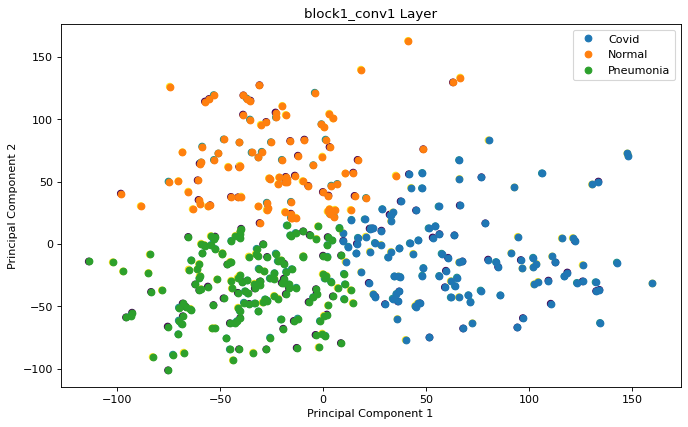

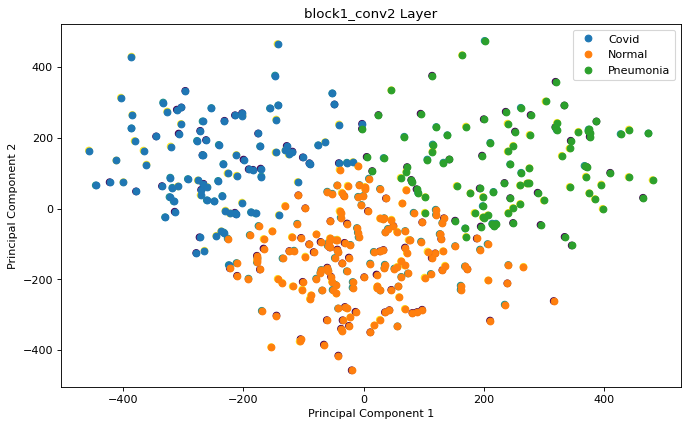

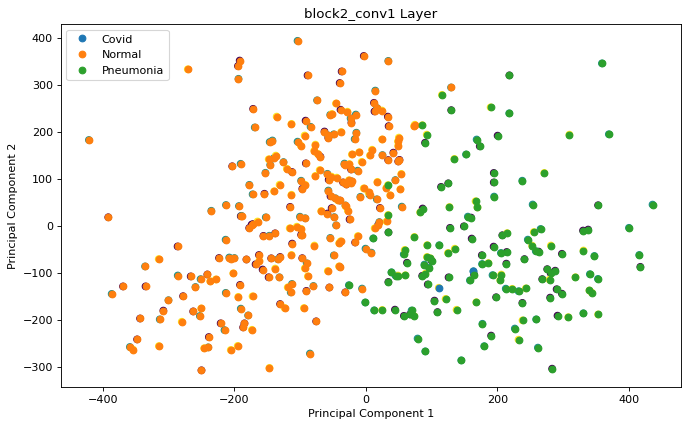

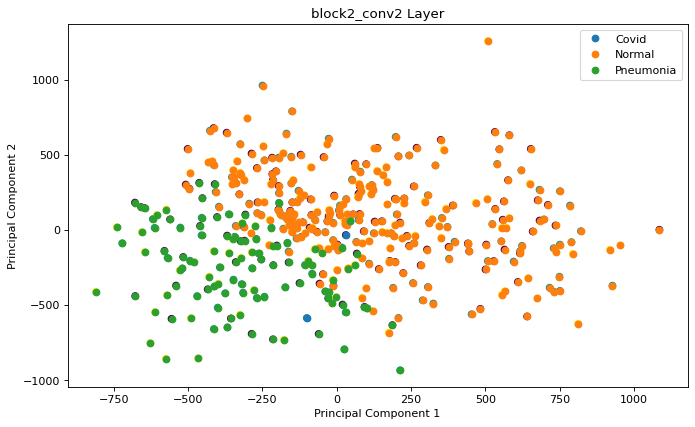

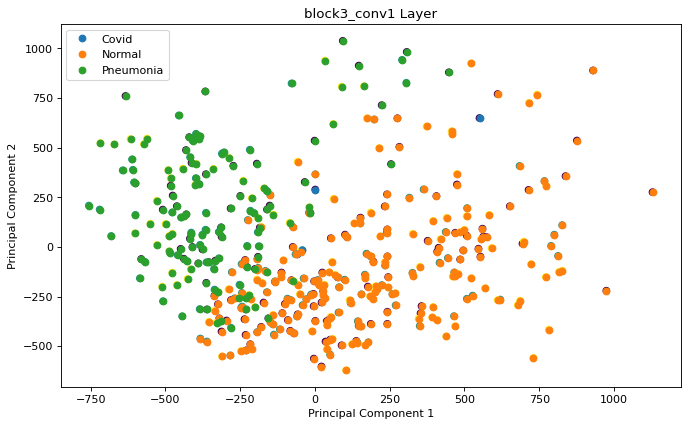

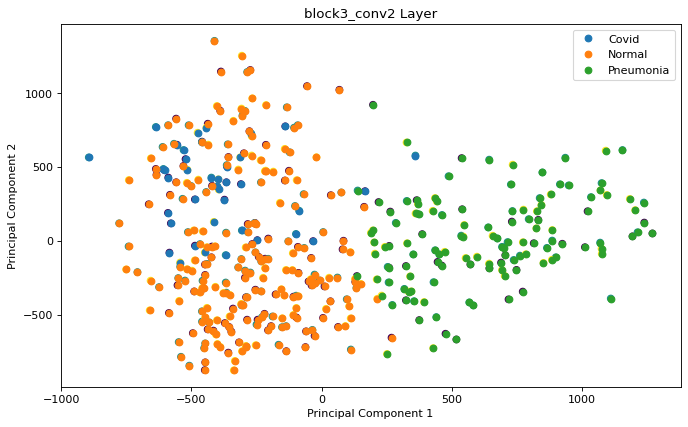

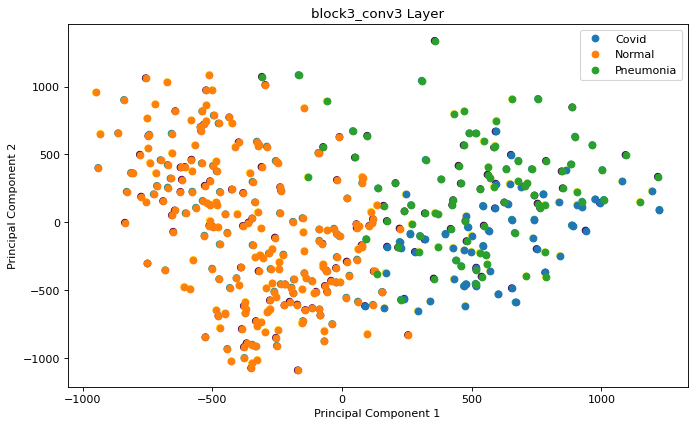

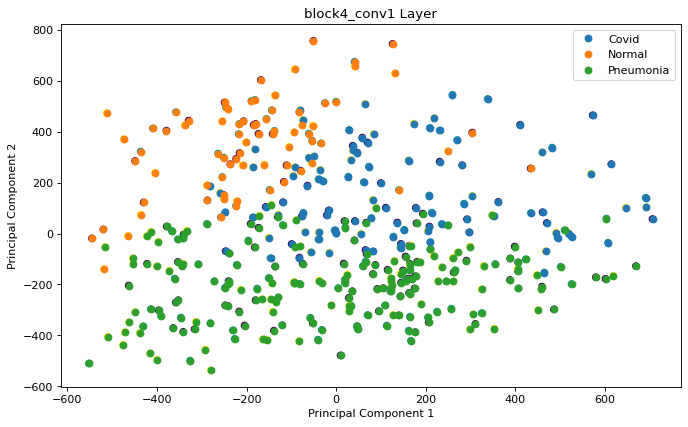

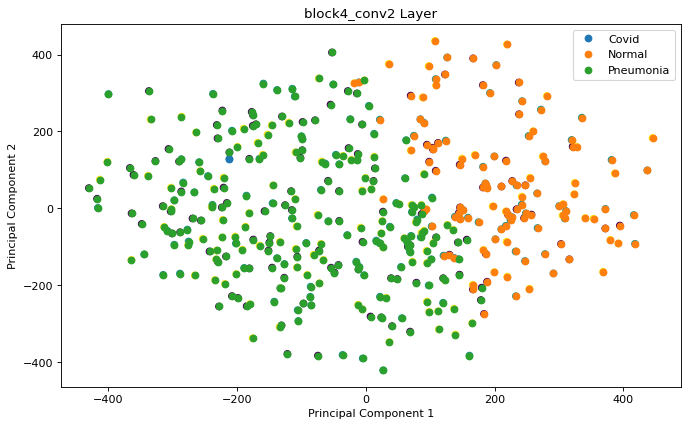

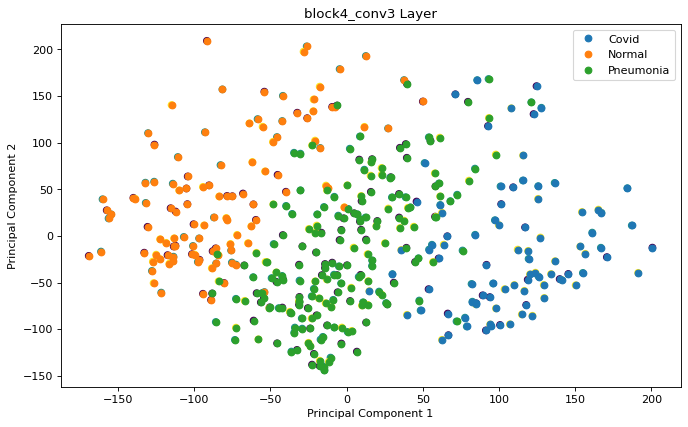

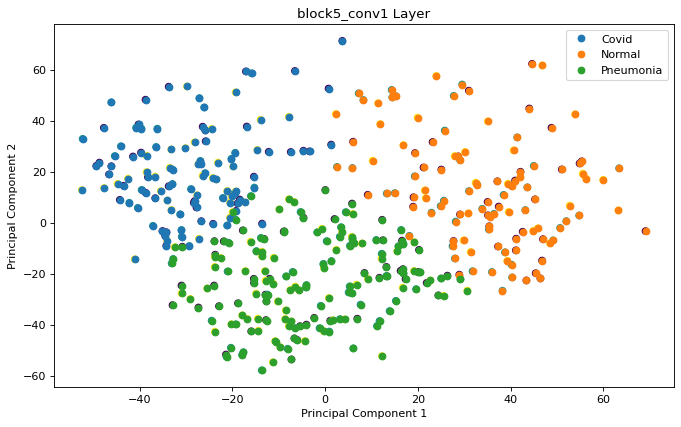

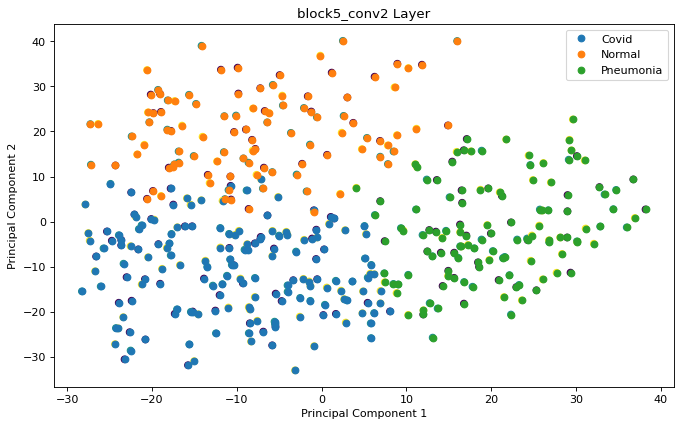

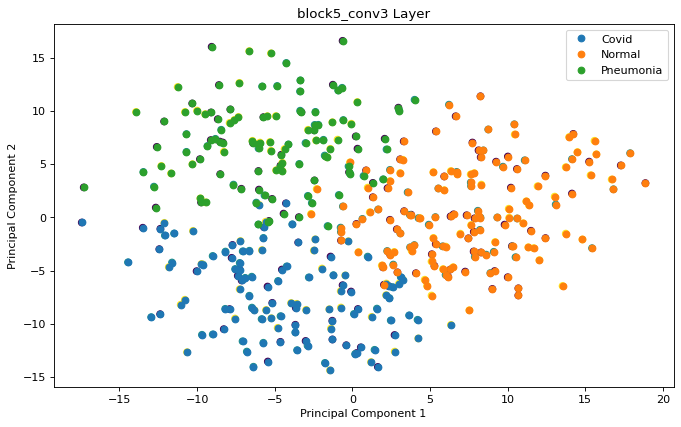

In [ ]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
model2= vgg16_model(input_shape=INPUT_SHAPE, num_classes=3, mname = 'VGG16')

means={}
weights={}
covariances={}
layer_labels={} ##layer predictions
layer_pred_df_pca={}   
train_gen_labels={}
train_gen_classes={}
for i in conv_indices[:13]:
  model2= vgg16_model(input_shape=INPUT_SHAPE, num_classes=3, mname = 'VGG16')
  layer_names=np.array([layer.name for layer in model.layers])
  new_model = tf.keras.models.Model(model2.inputs,model2.layers[i].output)
  new_model.summary()
  new_model_features= new_model.predict(train_generator)

  flattened=[]
  for j in new_model_features:
      flattened.append(j.flatten())

  flattened= np.array(flattened)
  df= pd.DataFrame(flattened)
  # scaled_data= scaler.fit_transform(df1)

  pc_f= PCA().fit(df)
  pc_ft= PCA().fit_transform(df)
  layer_pred_df_pca["{}".format(layer_names[int(i)])]=pc_ft
  
  plt.figure(figsize=(10,6), dpi=80)
  plt.scatter(pc_ft[:,0],pc_ft[:,1],c= train_generator.labels)
  plt.title('{}'.format(layer_names[int(i)]))


  gmm= GaussianMixture(n_components= 3, covariance_type='full').fit(pc_ft)


  means["{}".format(layer_names[int(i)])]= gmm.means_
  weights["{}".format(layer_names[int(i)])]= gmm.weights_
  covariances["{}".format(layer_names[int(i)])]= gmm.covariances_
 
 
  ##predictions from each layer
  labels= gmm.predict(pc_ft)
  layer_labels["{}".format(layer_names[int(i)])]= labels

  ##train generator (true classes of the images being classified by each layer)

  train_gen_labels["{}".format(layer_names[int(i)])]= train_generator.labels
  train_gen_classes["{}".format(layer_names[int(i)])]= train_generator.classes
  
  learned_data= pd.DataFrame({"X Value":pc_ft[:,0], "Y Value":pc_ft[:,1], "Category":labels})
  learned_data["Category"].replace({0: "Covid", 1: "Normal",2:"Pneumonia"}, inplace=True)
  learned_data

  groups= learned_data.groupby("Category")
  for name,group in groups:
    plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)
  plt.title("{} Layer".format(layer_names[int(i)]))
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.legend()

**USING SVM AS A CLASSIFIER**

In [ ]:
from sklearn import svm
clf= svm.SVC(kernel='rbf', random_state=0)
clf.fit(pc_ft, labels)

**PREDICTION WITH SVM**

In [ ]:

import pickle

##Save means for each layer
pickle_out = open("means3.pickle","wb")
pickle.dump(means, pickle_out)
pickle_out.close()


##Save covariances for each layer
pickle_out = open("cov3.pickle","wb")
pickle.dump(covariances, pickle_out)
pickle_out.close()

##Save weightts for each layer
pickle_out = open("weights3.pickle","wb")
pickle.dump(weights, pickle_out)
pickle_out.close()

# ##Save layer prediction dataframes for each layer
# pickle_out = open("pcfts3.pickle","wb")
# pickle.dump(layer_pred_df, pickle_out)
# pickle_out.close()

##Save gmm_labels for each layer

pickle_out = open("gmm_labels3.pickle","wb")
pickle.dump(layer_labels, pickle_out)
pickle_out.close()


##Save the labels of the augmented data used for training
pickle_out = open("layer_pred_df_pca.pickle","wb")
pickle.dump(layer_pred_df_pca, pickle_out)
pickle_out.close()


##Save the train_generator labels of the augmented data used for training
pickle_out = open("train_gen_labels.pickle","wb")
pickle.dump(train_gen_labels, pickle_out)
pickle_out.close()

##Save the train_generator labels of the augmented data used for training
pickle_out = open("train_gen_classes.pickle","wb")
pickle.dump(train_gen_classes, pickle_out)
pickle_out.close()
